<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/matt-sandbox/04-virtual-states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/matt-sandbox/04-virtual-states.ipynb" target="_parent"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# 4 - Virtual states

In [2]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qutip import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
plus = basis(2, 0)
minus = basis(2, 1)

In [258]:
V = 0.01
A = 0.1
omega = 2*A
max_bosons = 4 # The bigger this number the more accuracte your simualations will be. I tried 20 and it was almost the same as 4

In [259]:
a  = tensor(destroy(max_bosons+1), qeye(2))     # tensorised boson destruction operator
sx = tensor(qeye(max_bosons+1), sigmax())       # tensorised sigma_x operator
sz = tensor(qeye(max_bosons+1),sigmaz())        # tensorised sigma_z operator

two_state     =  A*sz                      # two state system energy
bosons       =  omega*(a.dag()*a+0.5)      # bosons field energy
interaction   = V*(a.dag() + a) * sx       # interaction energy

H = two_state + bosons + interaction
H0 = two_state + bosons

In [260]:
psi_0_plus = tensor(basis(max_bosons+1, 0), basis(2, 0))
P_0_plus = psi_0_plus*psi_0_plus.dag() 

In [261]:
times = np.linspace(0.0, 500.0, 20000)

In [262]:
psi_2_plus = tensor(basis(max_bosons+1, 2), basis(2, 0))
P_2_plus = psi_2_plus*psi_2_plus.dag() 

psi_1_minus = tensor(basis(max_bosons+1, 1), basis(2, 1))
P_1_minus = psi_1_minus*psi_1_minus.dag() 

In [263]:
result = sesolve(H, psi_0_plus, times,[a.dag()*a, H, P_1_minus, P_2_plus, H0])

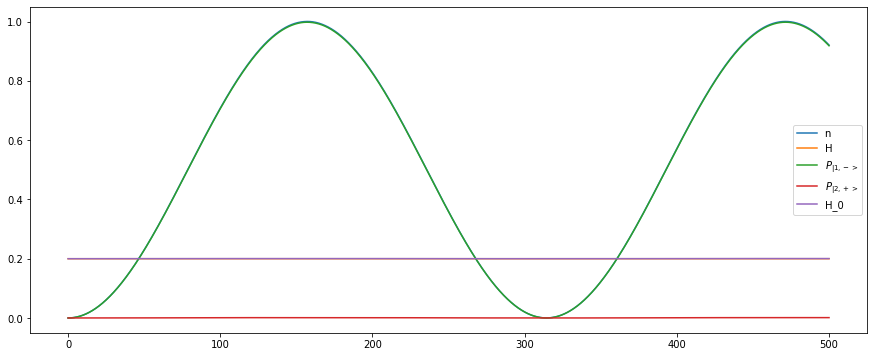

In [264]:
plt.figure(figsize=(15,6))
plt.plot(times,result.expect[0], label="n")
plt.plot(times,result.expect[1], label="H")
plt.plot(times,result.expect[2], label="$P_{|1,->}$")
plt.plot(times,result.expect[3], label="$P_{|2,+>}$")
plt.plot(times,result.expect[4], label="H_0")
plt.legend(loc="right")
plt.show();

In [149]:
Eig = H.eigenstates()

In [158]:
psi_0_plus_in_H_basis = psi_0_plus.transform(Eig[1])
psi_0_plus_in_H_basis

Quantum object: dims = [[5, 2], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[0.        ]
 [0.60845174]
 [0.        ]
 [0.77652691]
 [0.15886692]
 [0.        ]
 [0.        ]
 [0.03932103]
 [0.        ]
 [0.00275667]]

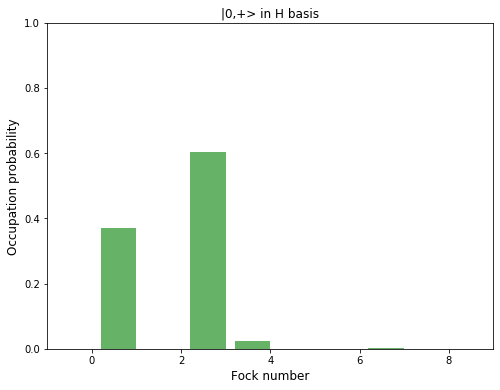

In [165]:
plot_fock_distribution(psi_0_plus_in_H_basis, title="|0,+> in H basis")
plt.xlim(-1,9);

So, |0,+> is mostly made up of the 3rd and then the 1st energy eigenstates (counting from 0). What does they look like?

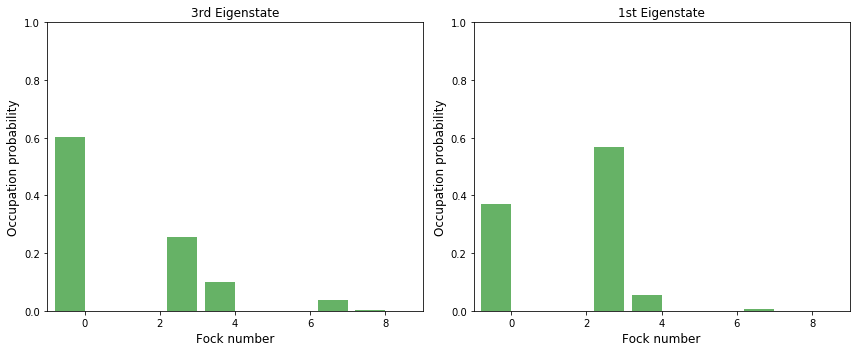

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plot_fock_distribution(Eig[1][3], title="3rd Eigenstate", ax=axes[0])
plot_fock_distribution(Eig[1][1],title="1st Eigenstate", ax=axes[1])
axes[0].set_xlim(-1,9)
axes[1].set_xlim(-1,9)
fig.tight_layout()

Both energy eigenstates are mostly made up of the |0,+> and |1,->. This aligns with our sense of spontaneous emission of a single boson and the two-state system going from + to -. This is also consistent with what we saw in the simulation.

What's most interesting is that both eigenstates also have a little bit of |2,+>. This is another way in which we can see that there is a chance for the system to start in |0,+> and then be observed later to be in the |2,+> state.

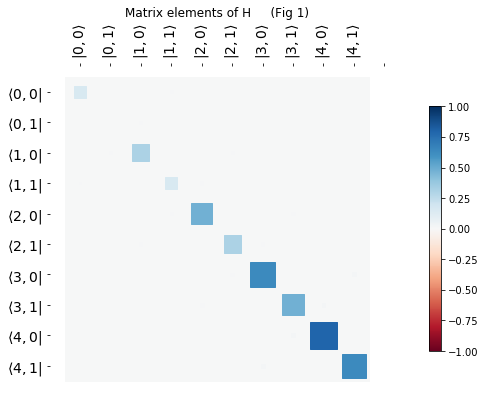

In [265]:
f, ax = hinton(H)
ax.tick_params(axis='x',labelrotation=90)
ax.set_title("Matrix elements of H     (Fig 1)");

In [232]:
expect(H,psi_2_plus)

0.6000000000000001

In [233]:
expect(H,psi_0_plus)

0.2